## 파이썬 딥러닝 머신러닝 입문
[출처](http://www.yes24.com/Product/Goods/96087004)
<br/>

#### 목적
scikit-learn 에서 제공하는 iris 데이터를 가지고 분류 모델을 설계한다.

<center> <b>Imported Libraries</b> </center>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

<center><b>Loading Data</b></center>

In [3]:
iris_dataset = load_iris(as_frame=True)
iris = iris_dataset.data
iris['target'] = iris_dataset.target

iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<center><b>Data Analysis</b></center>

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

<center><b>Visualization</b></center>

<AxesSubplot:>

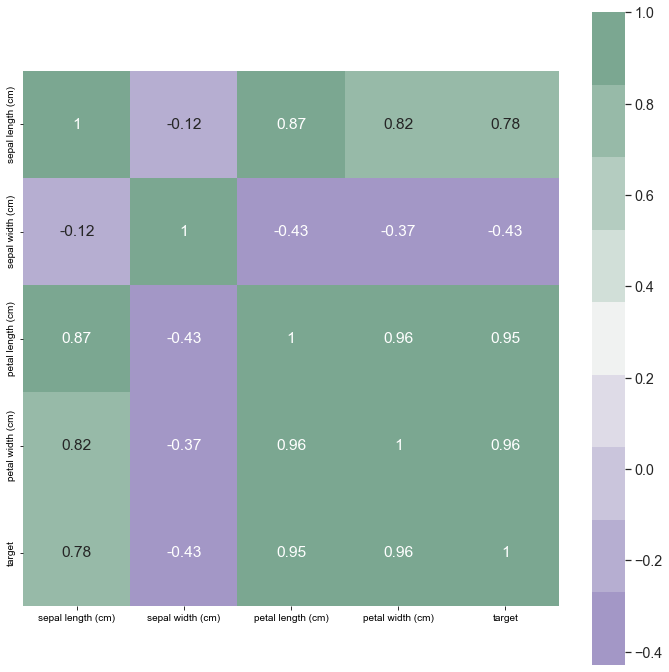

In [8]:
corr_mt = iris.corr()
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
                     
plt.subplots(figsize=(12,12))
sns.set(font_scale=1.3)
sns.heatmap(data=corr_mt,cmap=cmap,annot=True,square=True)        

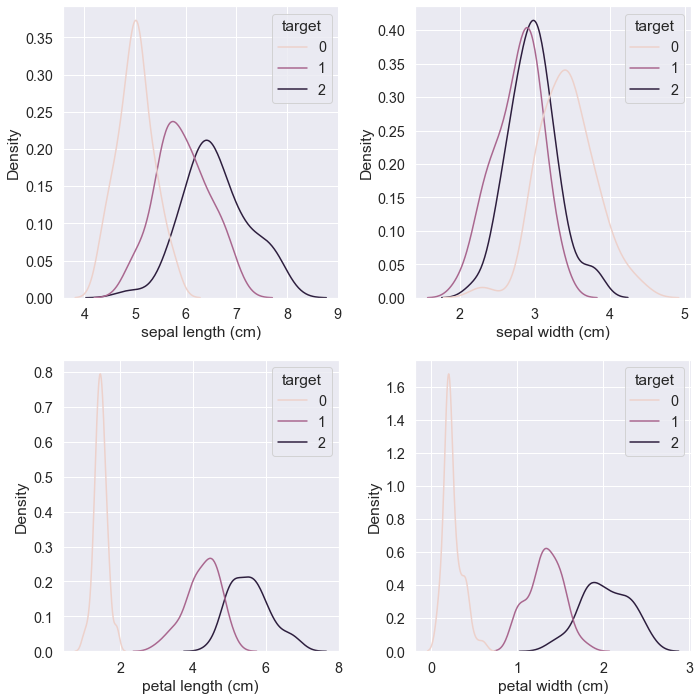

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axes = [*axes[0],*axes[1]]

for i,col in enumerate(iris.columns[iris.columns!='target']):
    sns.kdeplot(data=iris,hue='target',x=col,ax=axes[i])

fig.tight_layout()
plt.show()

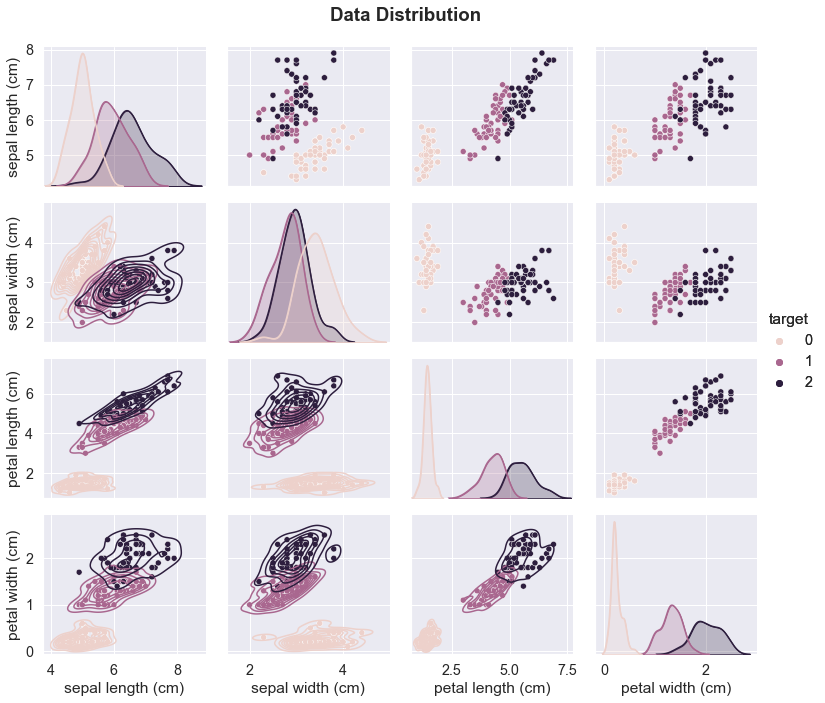

In [10]:
plot = sns.pairplot(iris,hue='target')

plot.map_diag(sns.kdeplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)

plot.fig.suptitle('Data Distribution',weight='bold')
plot.fig.tight_layout()
plot.add_legend()

<center><b>Data Preparation</b></center>

In [11]:
iris.columns = iris.columns.map(lambda x:'_'.join(x.split()[:2]))
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [12]:
x = iris.loc[:,iris.columns[iris.columns!='target']]
y = iris.loc[:,'target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

<center><b>Model Building</b></center>

### KNN - K Nearest Neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
clf_knn = KNeighborsClassifier(n_neighbors=7)

# training
clf_knn.fit(x_train,y_train)

# predict
y_pred = clf_knn.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy is - 100.00%


### SVM - Support Vector Machine

In [14]:
from sklearn.svm import SVC

# SVM
clf_svc = SVC(kernel='rbf')

# training
clf_svc.fit(x_train,y_train)

# predict
y_pred = clf_svc.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100)) # 100%...?

Accuracy is - 100.00%


### Linear Regression - Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# LR
# need to set max iteration number
lr = LogisticRegression(max_iter=1000)

# training
lr.fit(x_train,y_train)

# predict
y_pred = lr.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy is - 100.00%


### DT - Descision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

# DT
clf_dt = DecisionTreeClassifier(max_depth=3,random_state=42)

# train
clf_dt.fit(x_train,y_train)

# predict
y_pred = clf_dt.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy is - 100.00%


### Ensemble - Voting

In [17]:
from sklearn.ensemble import VotingClassifier

# voting
clf_vt = VotingClassifier(estimators=[('knn',clf_knn),('svm',clf_svc),('lr',lr),('DT',clf_dt)])

# train
clf_vt.fit(x_train,y_train)

# predict
y_pred = clf_vt.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy is - 100.00%


### Ensemble - Bagging

In [18]:
from sklearn.ensemble import RandomForestClassifier

# rf
clf_rf = RandomForestClassifier(n_estimators=50,random_state=42,max_depth=3)

# training
clf_rf.fit(x_train,y_train)

# predict
y_pred = clf_rf.predict(x_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy is - 100.00%


### Ensemble - Boosting
- used xgboost lib. more faster than sklearn boosting

In [23]:
from xgboost import XGBClassifier # Warning!!

# boosting
clf_bst = XGBClassifier(random_state=42, n_estimators=50, max_depth=3,use_label_encoder=False)

# training
clf_bst.fit(x_train,y_train)

# predict
y_pred = clf_bst.predict(x_test)

# this is same as predicting and calculate accuracy_score
# clf_bst.score(x_test,y_test)

# evaluate
print('Accuracy is - {0:0.2f}%'.format(accuracy_score(y_test,y_pred)*100))

[15:49:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is - 100.00%


C:\Users\kdh\miniconda3\envs\tf\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


<center><b>Cross Validation</b></center>

#### Hold Out
- 학습 데이터(기존에 나눈 train set) 일부를 검증 데이터로 사용한다.

In [20]:
x_tr,x_v, y_tr, y_v = train_test_split(x_train,y_train,test_size=0.3,shuffle=True,random_state=42)

rf = RandomForestClassifier(max_depth=3,random_state=42)
rf.fit(x_tr,y_tr)

y_tr_pred = rf.predict(x_tr)
y_v_pred = rf.predict(x_v)

print('train : {0:0.2f}'.format(accuracy_score(y_tr,y_tr_pred)*100))
print('val : {0:0.2f}'.format(accuracy_score(y_v,y_v_pred)*100))

# 과적합 됌

train : 98.63
val : 90.62


In [21]:
# 과적합을 다시 한 번 확인하기 위해 기존의 테스트 셋으로 진행해봄
y_test_pred = rf.predict(x_test)

print('predict : {0:0.2f}'.format(accuracy_score(y_test,y_test_pred)*100)) # 100% 가 나오는데 뭔가 이상하다..

predict : 100.00


#### K-fold
- hold out many times

In [22]:
from sklearn.model_selection import KFold

k_f = KFold(n_splits=5,shuffle=True,random_state=42)

accs = []
for tr,v in k_f.split(x_train,y_train):
    f_x_t = x_train.iloc[tr,:]
    f_x_v = x_train.iloc[v,:]
    f_y_t = y_train.iloc[tr]
    f_y_v = y_train.iloc[v]
    
    f_rf = RandomForestClassifier(max_depth=5,random_state=42)
    f_rf.fit(f_x_t,f_y_t)
    
    f_y_pred = f_rf.predict(f_x_v)
    this_acc = accuracy_score(f_y_v,f_y_pred)
    accs.append(this_acc)
    print('K-Fold ACC : {0:0.2f}'.format(this_acc))    

print('mean of K-Fold ACC : {0:0.2f}'.format(np.array(accs).mean()))

K-Fold ACC : 0.90
K-Fold ACC : 0.90
K-Fold ACC : 0.90
K-Fold ACC : 0.86
K-Fold ACC : 0.95
mean of K-Fold ACC : 0.90
